<a href="https://colab.research.google.com/github/devangi2000/Deep-Learning/blob/master/pyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as functional

#generate fake data and add noise
x = torch.randn(200, 1)
y = x.pow(4) + 0.05*torch.randn(x.size())


In [2]:
epoch = 100
learning_rate = 0.05

class Net(torch.nn.Module):
  def __init__(self, n_input, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_input, n_hidden)
    self.output = torch.nn.Linear(n_hidden, n_output)

  def forward(self, input):
    hidden = functional.relu(self.hidden(input))
    output = self.output(hidden)
    return output


In [3]:
net = Net(1,15,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)


In [4]:
lossFunc = torch.nn.MSELoss()

In [5]:
for i in range(epoch):
  output = net(x)
  loss = lossFunc(output, y)
  net.zero_grad()
  loss.backward()

  for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

  print(i, 'th loss is ', loss.squeeze())

0 th loss is  tensor(98.3496, grad_fn=<SqueezeBackward0>)
1 th loss is  tensor(82.6012, grad_fn=<SqueezeBackward0>)
2 th loss is  tensor(74.3282, grad_fn=<SqueezeBackward0>)
3 th loss is  tensor(68.8858, grad_fn=<SqueezeBackward0>)
4 th loss is  tensor(64.7003, grad_fn=<SqueezeBackward0>)
5 th loss is  tensor(60.9566, grad_fn=<SqueezeBackward0>)
6 th loss is  tensor(57.4967, grad_fn=<SqueezeBackward0>)
7 th loss is  tensor(54.2187, grad_fn=<SqueezeBackward0>)
8 th loss is  tensor(51.0546, grad_fn=<SqueezeBackward0>)
9 th loss is  tensor(47.9745, grad_fn=<SqueezeBackward0>)
10 th loss is  tensor(44.9959, grad_fn=<SqueezeBackward0>)
11 th loss is  tensor(42.1275, grad_fn=<SqueezeBackward0>)
12 th loss is  tensor(39.4172, grad_fn=<SqueezeBackward0>)
13 th loss is  tensor(36.8954, grad_fn=<SqueezeBackward0>)
14 th loss is  tensor(34.5634, grad_fn=<SqueezeBackward0>)
15 th loss is  tensor(32.4121, grad_fn=<SqueezeBackward0>)
16 th loss is  tensor(30.4177, grad_fn=<SqueezeBackward0>)
17 th l

In [6]:
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15), torch.nn.ReLU(), torch.nn.Linear(15,1))
lossFunc = torch.nn.MSELoss()
print(seq_net)

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)


In [7]:
for i in range(epoch):
  output = net(x)
  loss = lossFunc(output, y)
  net.zero_grad()
  loss.backward()

  for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

  print(i, 'th loss is ', loss.squeeze())

0 th loss is  tensor(9.6817, grad_fn=<SqueezeBackward0>)
1 th loss is  tensor(8.4218, grad_fn=<SqueezeBackward0>)
2 th loss is  tensor(10.0459, grad_fn=<SqueezeBackward0>)
3 th loss is  tensor(8.5776, grad_fn=<SqueezeBackward0>)
4 th loss is  tensor(10.1625, grad_fn=<SqueezeBackward0>)
5 th loss is  tensor(8.5229, grad_fn=<SqueezeBackward0>)
6 th loss is  tensor(10.0174, grad_fn=<SqueezeBackward0>)
7 th loss is  tensor(8.2886, grad_fn=<SqueezeBackward0>)
8 th loss is  tensor(9.6420, grad_fn=<SqueezeBackward0>)
9 th loss is  tensor(7.9251, grad_fn=<SqueezeBackward0>)
10 th loss is  tensor(9.1206, grad_fn=<SqueezeBackward0>)
11 th loss is  tensor(7.5038, grad_fn=<SqueezeBackward0>)
12 th loss is  tensor(8.5570, grad_fn=<SqueezeBackward0>)
13 th loss is  tensor(7.0801, grad_fn=<SqueezeBackward0>)
14 th loss is  tensor(8.0201, grad_fn=<SqueezeBackward0>)
15 th loss is  tensor(6.6980, grad_fn=<SqueezeBackward0>)
16 th loss is  tensor(7.5594, grad_fn=<SqueezeBackward0>)
17 th loss is  tensor

In [8]:
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15), torch.nn.ReLU(), torch.nn.Linear(15,1))
lossFunc = torch.nn.MSELoss()
print(seq_net)

optim = torch.optim.SGD(seq_net.parameters(), lr=0.0611, momentum=0.9)
for i in range(epoch):
  output = seq_net(x)
  loss = lossFunc(output, y)
  optim.zero_grad()
  loss.backward()

  optim.step() #param updation
  if ((i+1) % 4) == 0:
    print(str(i+1) + ' th loss is '+ str(loss.squeeze()))

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)
4 th loss is tensor(64.2278, grad_fn=<SqueezeBackward0>)
8 th loss is tensor(38.8788, grad_fn=<SqueezeBackward0>)
12 th loss is tensor(92.2776, grad_fn=<SqueezeBackward0>)
16 th loss is tensor(101.5517, grad_fn=<SqueezeBackward0>)
20 th loss is tensor(80.9151, grad_fn=<SqueezeBackward0>)
24 th loss is tensor(79.7701, grad_fn=<SqueezeBackward0>)
28 th loss is tensor(80.3601, grad_fn=<SqueezeBackward0>)
32 th loss is tensor(79.3924, grad_fn=<SqueezeBackward0>)
36 th loss is tensor(79.6857, grad_fn=<SqueezeBackward0>)
40 th loss is tensor(79.1633, grad_fn=<SqueezeBackward0>)
44 th loss is tensor(79.1659, grad_fn=<SqueezeBackward0>)
48 th loss is tensor(78.9998, grad_fn=<SqueezeBackward0>)
52 th loss is tensor(78.9705, grad_fn=<SqueezeBackward0>)
56 th loss is tensor(78.9683, grad_fn=<SqueezeBackward0>)
60 th loss is tensor(78.9324, grad_fn=<SqueezeB

Net(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.6, inplace=False)
  (3): Linear(in_features=15, out_features=1, bias=True)
  (4): ReLU()
)


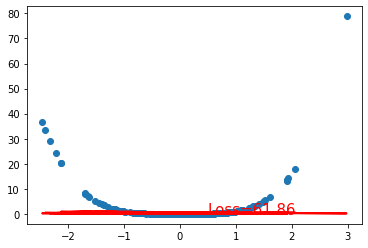

4th loss tensor(56.3554, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 3 = 86.5


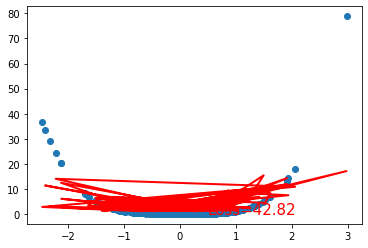

8th loss tensor(38.9643, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 7 = 88.5


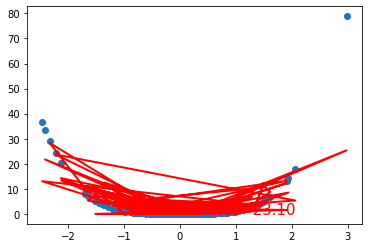

12th loss tensor(42.7803, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 11 = 86.5
16th loss tensor(18.5591, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 15 = 24.0


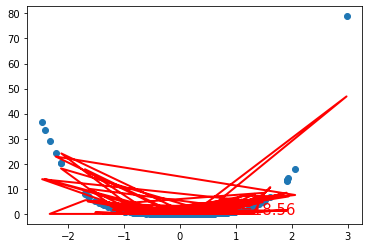

20th loss tensor(45.7672, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 19 = 16.5


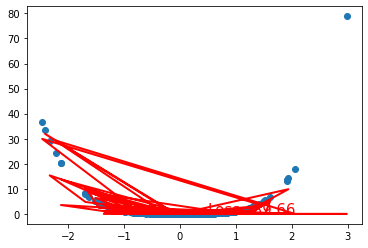

24th loss tensor(22.1077, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 23 = 10.0


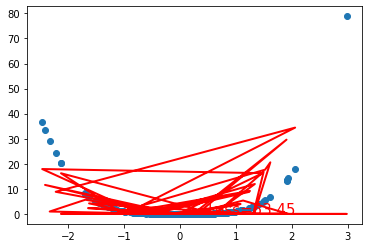

28th loss tensor(52.3084, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 27 = 5.5


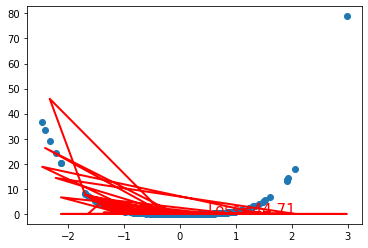

32th loss tensor(42.3476, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 31 = 2.5
36th loss tensor(48.1684, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 35 = 3.5


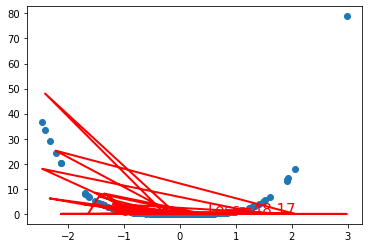

40th loss tensor(43.2171, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 39 = 13.0


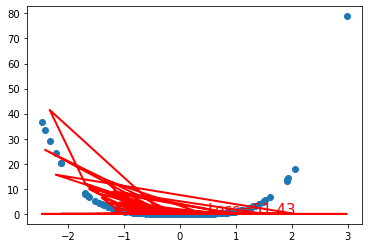

44th loss tensor(49.1184, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 43 = 1.0


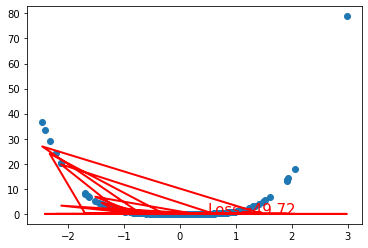

48th loss tensor(56.0505, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 47 = 2.0


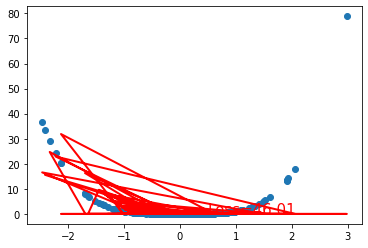

52th loss tensor(56.1547, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 51 = 7.0
56th loss tensor(54.3223, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 55 = 3.5


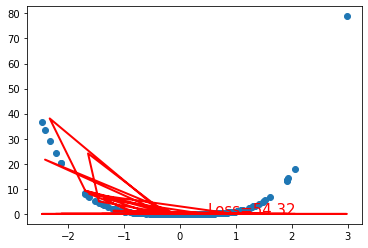

60th loss tensor(60.0167, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 59 = 0.0


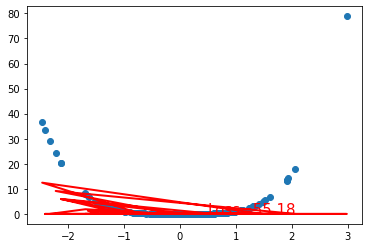

64th loss tensor(59.7209, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 63 = 77.5


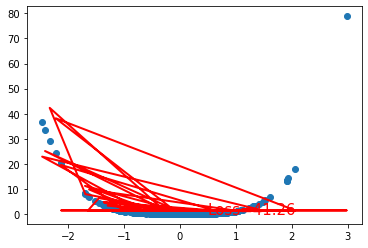

68th loss tensor(48.0958, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 67 = 82.5


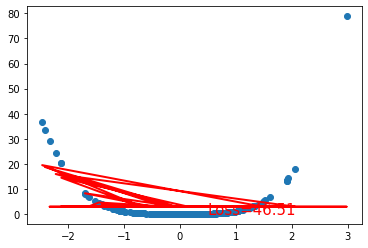

72th loss tensor(46.4235, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 71 = 88.0
76th loss tensor(51.3601, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 75 = 85.0


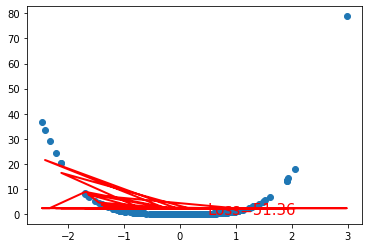

80th loss tensor(50.7433, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 79 = 80.0


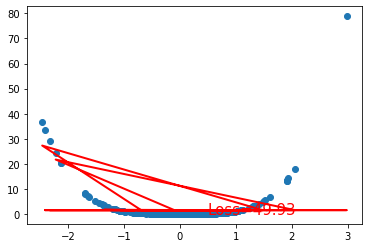

84th loss tensor(45.8571, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 83 = 84.5


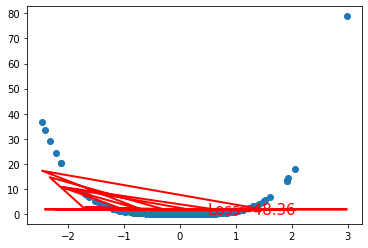

88th loss tensor(54.7260, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 87 = 82.5


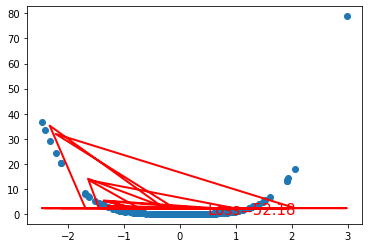

92th loss tensor(57.1626, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 91 = 86.5
96th loss tensor(49.5953, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 95 = 83.0


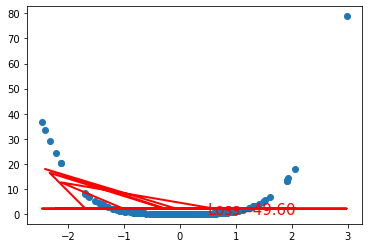

100th loss tensor(51.5092, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 99 = 83.5


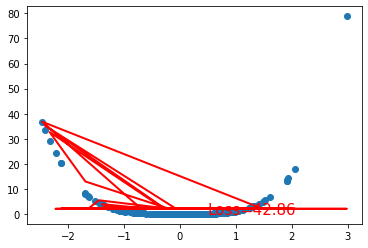

104th loss tensor(46.9996, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 103 = 85.0


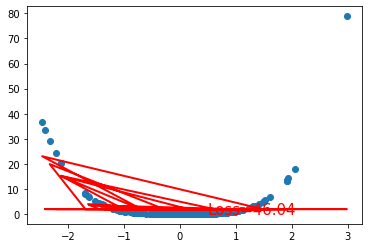

108th loss tensor(57.4244, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 107 = 82.0


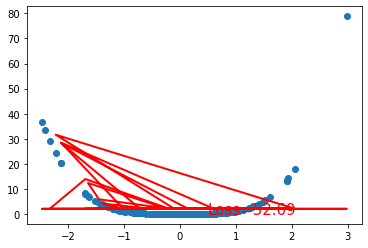

112th loss tensor(48.7298, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 111 = 84.5
116th loss tensor(43.5365, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 115 = 82.5


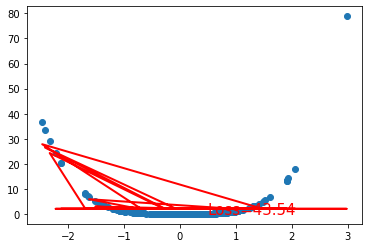

120th loss tensor(48.6179, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 119 = 84.5


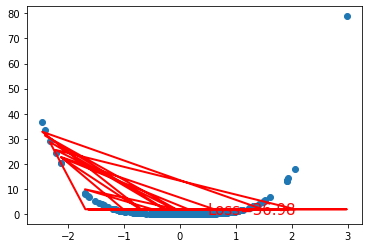

124th loss tensor(50.2706, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 123 = 81.0


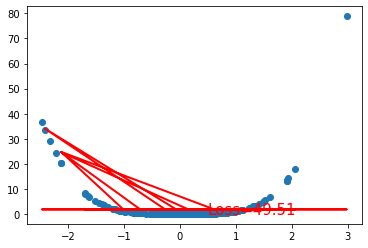

128th loss tensor(48.7113, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 127 = 83.5


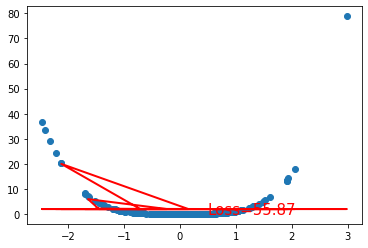

132th loss tensor(47.6637, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 131 = 82.0
136th loss tensor(49.7549, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 135 = 84.5


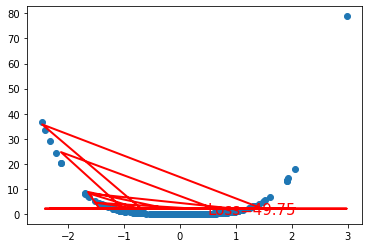

140th loss tensor(57.3027, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 139 = 82.5


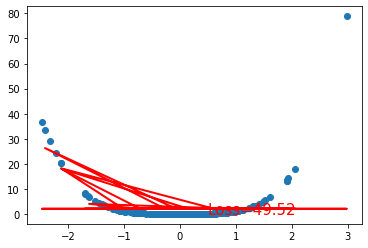

144th loss tensor(52.1154, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 143 = 84.0


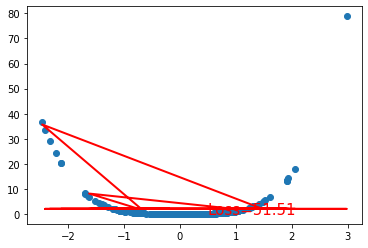

148th loss tensor(48.8405, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 147 = 84.0


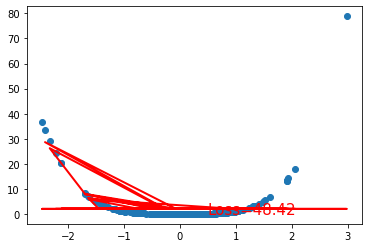

152th loss tensor(57.4414, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 151 = 83.0
156th loss tensor(47.9361, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 155 = 85.5


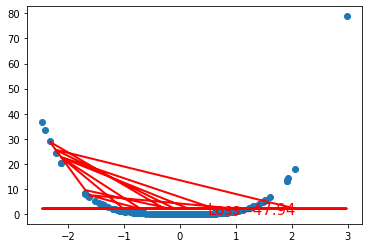

160th loss tensor(53.1800, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 159 = 83.5


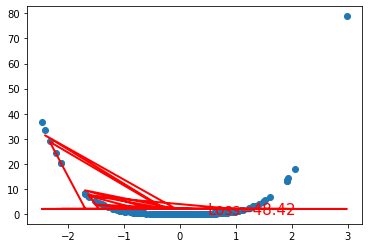

164th loss tensor(52.4413, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 163 = 83.0


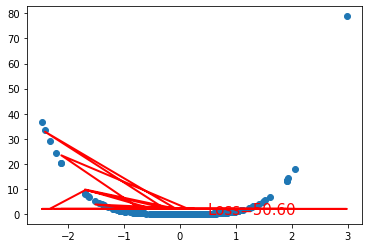

168th loss tensor(50.8469, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 167 = 83.0


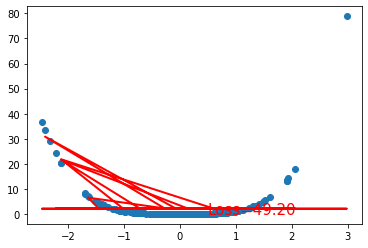

172th loss tensor(48.5107, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 171 = 83.5
176th loss tensor(51.8409, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 175 = 85.0


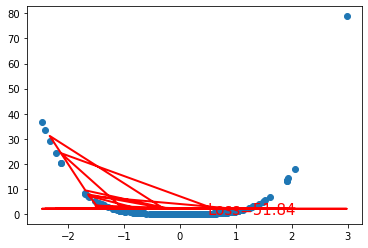

180th loss tensor(48.4150, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 179 = 83.5


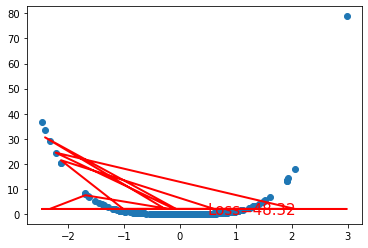

184th loss tensor(53.6518, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 183 = 83.0


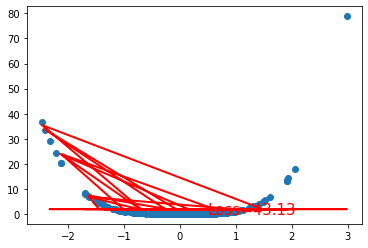

188th loss tensor(53.5000, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 187 = 82.0


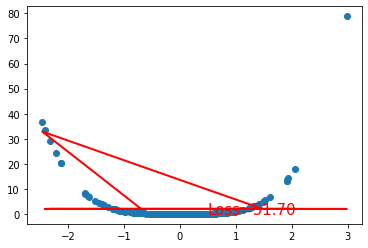

192th loss tensor(41.0307, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 191 = 83.5
196th loss tensor(53.3998, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 195 = 84.0


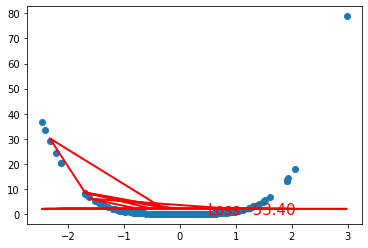

200th loss tensor(47.2071, grad_fn=<SqueezeBackward0>)
Accuracy at epoch 199 = 83.5


In [2]:
import matplotlib.pyplot as plt


x = torch.randn(200,1) #Generate random data
y = x.pow(4) + 0.05*torch.rand(x.size()) #add some noise to the output
epoch = 200
learning_rate = 0.01
epsilon = 1e-4

#Manual Method. Involves building the layer architecture:

class Net(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        '''
        Intialize 2 layer neural net
        '''
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_input, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, input):
        '''
        input=> The input to compute forward prop on
        returns => output after forward prop
        '''
        hidden = functional.relu(self.hidden(input))
        output = self.output(hidden)
        return output

net = Net(1,15,1)
print(net)

#Antoher method using Sequential function. Much less work
seq_net = torch.nn.Sequential(torch.nn.Linear(1, 15),
                              torch.nn.ReLU(),
                              torch.nn.Dropout(p=0.6),
                              torch.nn.Linear(15, 1),
                              torch.nn.ReLU()
                             )

print(seq_net) #This should be same as net

lossFunc = torch.nn.MSELoss()  #Mean Squared Error Function
optim = torch.optim.SGD(seq_net.parameters(), lr=0.05, momentum=0.9) #SGD optimizer with momentum

for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network with another
    '''
    output = seq_net(x) #forward Prop
    loss = lossFunc(output,y)
    optim.zero_grad()
    loss.backward()
    #Manual Updation of parameters
    '''
    for f in seq_net.parameters():
        f.data.sub_(f.grad.data*learning_rate)
    '''
    optim.step()
    if (i+1)%4==0 :
        print(str((i+1))+'th loss', loss.squeeze())
        correct = (y-output < epsilon).float().sum()
        print(f"Accuracy at epoch {i} = {(correct/x.shape[0]) * 100}")
    if i % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), output.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, f'Loss={loss.data:.{2}f}', fontdict={'size': 15, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show(block=False)